In [3]:
import sys
sys.executable


'/Users/jacobbassett/projects/courses/opencv/opencv-jupyter/.venv/bin/python3.12'

In [4]:
# import tools

import cv2
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np 

In [5]:
# load shapes image and convert color

img = cv2.imread("data/images/Image.png")
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
threshold, img_thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

hs,ws,cs = img.shape
print(hs,ws,cs)

720 720 3


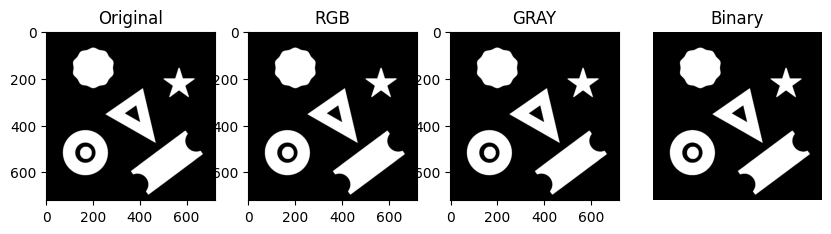

In [6]:
# display original, rgb, gray and binary images

plt.figure(figsize=(10,3))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1,4,2)
plt.title("RGB")
plt.imshow(img_rgb)

plt.subplot(1,4,3)
plt.title("GRAY")
plt.imshow(img_gray, cmap='gray')

plt.subplot(1,4,4)
plt.title("Binary")
plt.axis('off')
plt.imshow(img_thr, cmap='gray')

plt.show()

In [7]:
# find contours from gray image

contours_img, hierarchy = cv2.findContours(img_gray,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

contours_img = sorted(contours_img, key=cv2.contourArea, reverse=True)

img_blank = np.zeros((hs,ws,cs),np.uint8)

print(contours_img[0].shape)

(750, 1, 2)


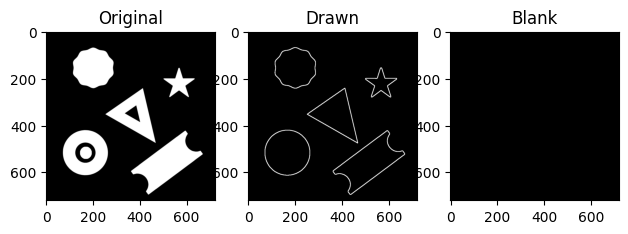

In [8]:
# draw contours onto blank image

img_drawn = img_blank.copy()
cv2.drawContours(img_drawn,contours_img, -1,(255,255,255),2)

plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1,4,2)
plt.title("Drawn")
plt.imshow(img_drawn)

plt.subplot(1,4,3)
plt.title("Blank")
plt.imshow(img_blank)
plt.show()

In [45]:
# find area of contours

for idx,con in enumerate(contours_img):
    con_area = round(cv2.contourArea(con))
    print(f'Contour {idx}:              {con_area} area')
    mar = cv2.minAreaRect(con)
    x,y = mar[0]
    mr_area = round(x*y)
    print(f'Min Rect Contour {idx}:     {mr_area} area')
    x,y,w,h = cv2.boundingRect(con)
    br_area = round(w*h)
    print(f'Bounded Rect Contour {idx}: {br_area} area')
    print()

Contour 0:              31898 area
Min Rect Contour 0:     288186 area
Bounded Rect Contour 0: 83538 area

Contour 1:              28978 area
Min Rect Contour 1:     86765 area
Bounded Rect Contour 1: 37056 area

Contour 2:              22854 area
Min Rect Contour 2:     31378 area
Bounded Rect Contour 2: 30276 area

Contour 3:              21896 area
Min Rect Contour 3:     136729 area
Bounded Rect Contour 3: 50760 area

Contour 4:              6214 area
Min Rect Contour 4:     123780 area
Bounded Rect Contour 4: 16884 area



In [10]:
# find there origin

img_org = img.copy()
img_b_org = img_blank.copy()
for idx,con in enumerate(contours_img):
    x,y,w,h = cv2.boundingRect(con)
    cv2.circle(img_org,(x,y),2,(0,0,255),10)
    cv2.rectangle(img_org,(x,y),(x+w,y+h),(0,255,0),3)
    cv2.circle(img_b_org,(x,y),2,(0,0,255),10)
    cv2.rectangle(img_b_org,(x,y),(x+w,y+h),(0,255,0),3)
    print(f'Contour {idx}: ({x},{y}) origin')
    
# plt.imshow(img_origins)

Contour 0: (362,424) origin
Contour 1: (72,422) origin
Contour 2: (114,70) origin
Contour 3: (252,243) origin
Contour 4: (500,156) origin


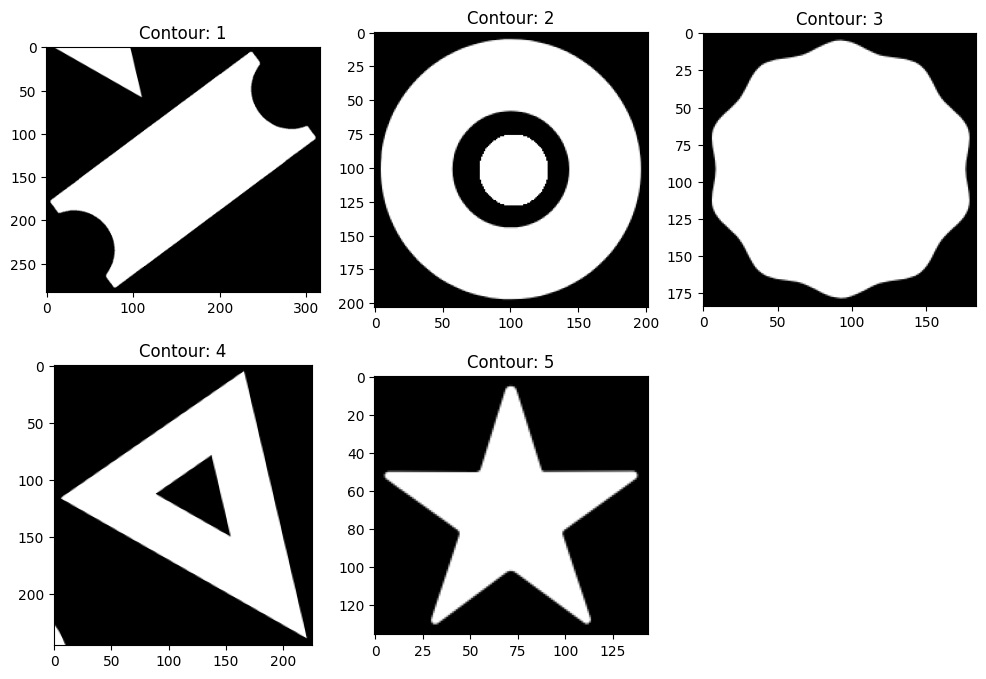

In [11]:
# crop into smaller images by contour

plt.figure(figsize=(12,8))

for idx,con in enumerate(contours_img):
    x,y,w,h = cv2.boundingRect(con)
    crp = img_gray[y-5:y+h+5,x-5:x+w+5]
    plt.subplot(2,3,idx+1)
    plt.title(f"Contour: {idx+1}")
    plt.imshow(crp, cmap="gray")

plt.show()
    

In [12]:
# apply contours to image

img_con = img.copy()

cv2.drawContours(img_con,contours_img,-1,(255,0,0),3)
print()

In [13]:
# apply convexHull to image and display

img_convex = img.copy()
convex = [cv2.convexHull(con) for con in contours_img]
cv2.drawContours(img_convex,convex,-1,(255,255,0),3)
print()

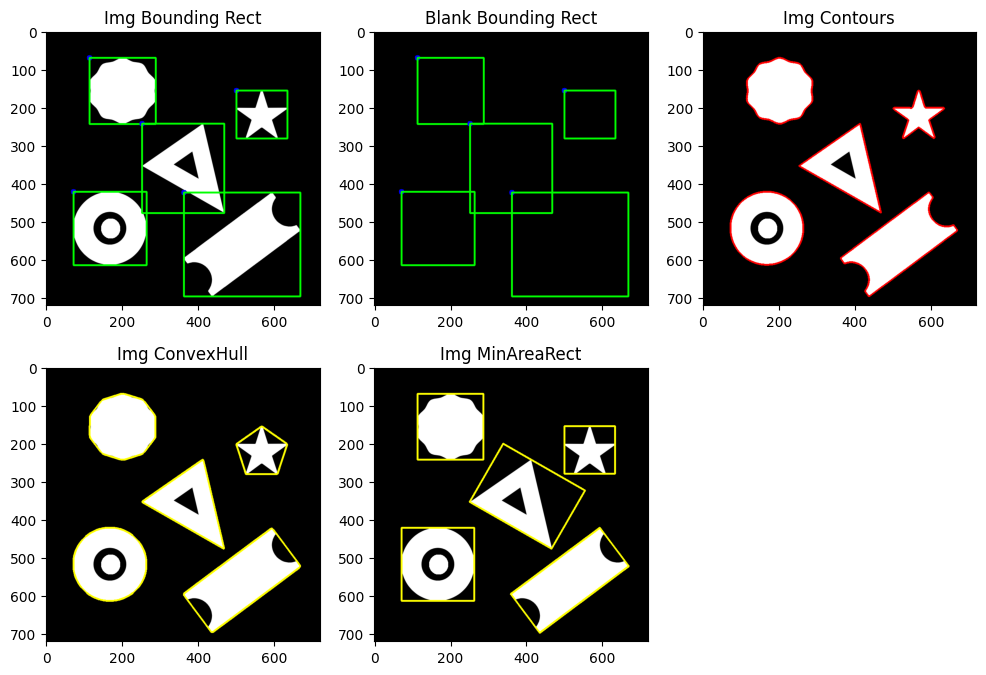

In [14]:
# apply minAreaRect to image and display

img_mnm = img.copy()
mnm_rect = [cv2.minAreaRect(con) for con in contours_img]
mnm_bx = [cv2.boxPoints(mnm).astype('int') for mnm in mnm_rect]
cv2.drawContours(img_mnm, mnm_bx,-1,(255,255,0),3)

plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.title('Img Bounding Rect')
plt.imshow(img_org)

plt.subplot(2,3,2)
plt.title('Blank Bounding Rect')
plt.imshow(img_b_org)

plt.subplot(2,3,3)
plt.title('Img Contours')
plt.imshow(img_con)

plt.subplot(2,3,4)
plt.title('Img ConvexHull')
plt.imshow(img_convex)

plt.subplot(2,3,5)
plt.title('Img MinAreaRect')
plt.imshow(img_mnm)

plt.show()

(720, 720, 3)


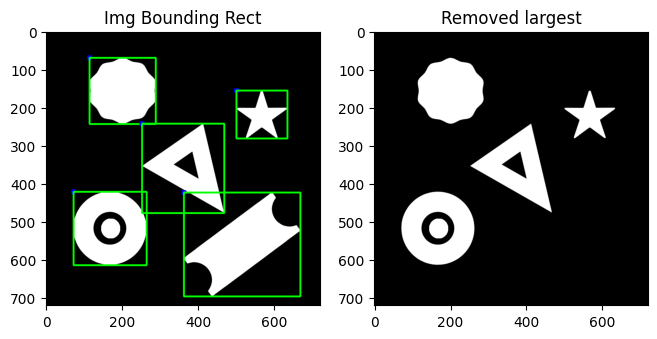

In [15]:
# remove largest contour

img_mns_shp = img.copy()

cv2.drawContours(img_mns_shp,contours_img,0,(0,0,0),-1)

plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.title('Img Bounding Rect')
plt.imshow(img_org)

plt.subplot(2,3,2)
plt.title('Removed largest')
plt.imshow(img_mns_shp)

print(img_mns_shp.shape)


In [46]:
# load battery image

btr = cv2.imread('data/images/sample_image.png')

btr_rgb = cv2.cvtColor(btr,cv2.COLOR_BGR2RGB)
btr_gry = cv2.cvtColor(btr,cv2.COLOR_BGR2GRAY)

wb,hb,cb = btr.shape
btr_blank = np.zeros((wb,hb,cb),np.uint8) 
btr_blank1 = np.zeros_like(btr,np.uint8) # same as above

(1340, 1340, 3) (1340, 1340, 3) (1340, 1340) (1340, 1340)
255 0
150.0


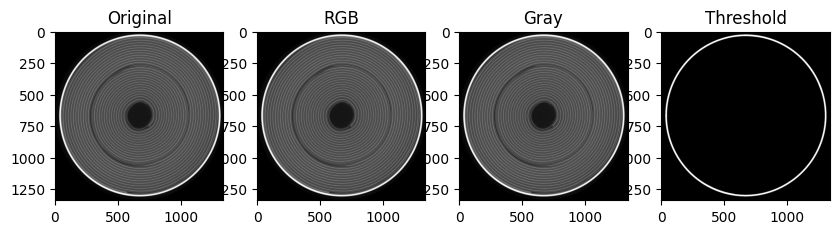

In [47]:
# threshold and display images

threshold, btr_thr = cv2.threshold(btr_gry,150,255,cv2.THRESH_BINARY)

plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(btr)

plt.subplot(1,4,2)
plt.title('RGB')
plt.imshow(btr_rgb)

plt.subplot(1,4,3)
plt.title('Gray')
plt.imshow(btr_gry, cmap='gray')

plt.subplot(1,4,4)
plt.title('Threshold')
plt.imshow(btr_thr, cmap='gray')

print(btr.shape, btr_rgb.shape, btr_gry.shape, btr_thr.shape)
print(max(btr_thr[h//2,:]), min(btr_thr[h//2,:]))
print(threshold)

5


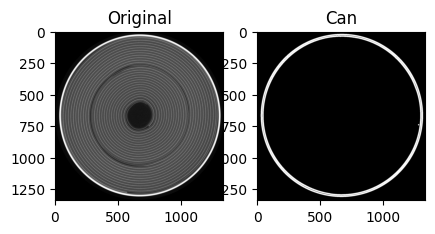

In [18]:
# find the contours of the can and display

contours_can,hierarchy = cv2.findContours(btr_thr,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

contours_can = sorted(contours_can, key=cv2.contourArea, reverse=True)

btr_can = btr_blank.copy()

cv2.drawContours(btr_can,contours_can,-1,(255,255,255),10)

plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(btr)

plt.subplot(1,4,2)
plt.title('Can')
plt.imshow(btr_can)

print(len(contours_can))

In [19]:
# declare the variables of the inner and outer diameter of the can

otr, inn = contours_can[0], contours_can[1]

In [20]:
# find radius and origin of inner and outer contours of can

oa, ia = cv2.contourArea(otr), cv2.contourArea(inn)

om, im = cv2.moments(otr), cv2.moments(inn)

oma, ima = int(om['m00']), int(im['m00'])

ox, oy = int(om['m10']/om['m00']), int(om['m01']/om['m00'])

ix, iy = int(im['m10']/im['m00']), int(im['m01']/im['m00'])

print(len(otr),len(inn))
print(oa, ia)
print(oma,ima)
print(ox,oy)
print(ix,iy)


1851 1934
1286151.0 1236771.5
1286151 1236771
672 669
672 669


In [21]:
# find the perimeter of the can

op, ip = cv2.arcLength(otr,True), cv2.arcLength(inn,True)
print(op, ip)

4249.462443232536 4222.817779421806
